### EE 699 Next Generation Wireless Networks 
- Assignment 02 
- Author: $\text{Rishabh Pomaje}$ 
- Contact: 210020036@iitdh.ac.in

- In this notebook, we will simulate the following queues and compare our empirical findings with the analytic results.
- Scheduling discipline used : _First-In-First-Out_.

#### <font color='red'> Note </font>
- In order to make the below jupyter notebook and code contents in it memory and speed efficient, I have reused the variable names. This also provides an additional benefit of consistency of definitions. The downside is that, due to the way jupyter nb works when reusing variables, the previous data is overwritten, it is highly likely that once you run a cell and go to a previous cell and run it again, it will give erroneous, invalid results. 

- I suggest that you run the complete notebook at once or a cell at a time (but in a flow) to avoid such issues. 

- Due to extensive simulation period (for better generalisation and reaching steady state), I request you give each queue simulation ~10 seconds to complete.

In [56]:
# Dependencies :
import numpy as np
import queue_models as qm

import matplotlib.pyplot as plt 
%config InlineBackend.figure_format='svg'
# Set global parameters for publication quality
plt.rcParams.update({
    "text.usetex": True,            # Comment if TeX is unavailable on your machine 
    "font.family": "serif",          
})
import seaborn as sns 
sns.set_theme('paper')

In [57]:
# Global functions :
def factorial(n):
    n_fac = 1 
    for i in range(1, n+1):
        n_fac *= i
    
    return n_fac

In [58]:
# Global Definitions :
del_t = 10 ** -3            # smallest time resolution :: in some time units

# del_t = 10 ** -4            # Uncomment for better matching of empirical results*     
total_simul_time = 1000     # In common time units
arrival_rate = 6            # Number of arrivals per unit time
departure_rate = 11         # Number of departure per unit time

# * making del_t smaller will result in closer matching of the analytical results with empirical ones.
# However, the simulation time (execution time) of the code increases. It might require upto 2-3 mins 
# per queue for simluation to complete. 

#### M/M/1 Queue

- Note: The arrival rate should be lesser than the departure rate to achieve equilibrium.

In [59]:
queue_history, arr_Times, dep_Times, ind_Times = qm.m_m_1_q(total_simul_time, del_t, arrival_rate, departure_rate)

- Evolution of the state of the system

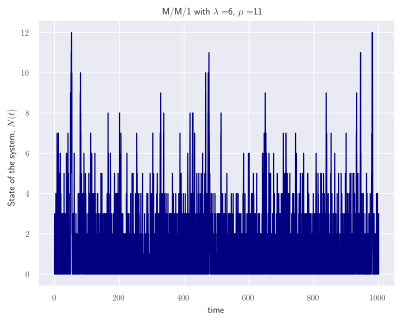

In [60]:
fig, axes = plt.subplots()
axes.plot(del_t * np.arange(int(total_simul_time / del_t)), queue_history, color='navy')
axes.set_xlabel(f'time')
axes.set_ylabel(f'State of the system, $N(t)$')
axes.set_title(f'M/M/1 with $\lambda =${arrival_rate}, $\mu = ${departure_rate}')
fig.savefig(f'simulation_results/mm1_state_history_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mm1_state_history_{arrival_rate}_{departure_rate}.svg', transparent=True)

Observations: 
1. The queue size does not grow without bounds when $\lambda < \mu$. 

- Distribution of Inter-Arrival times

1. Analytical Distribution :
    Inter-arrival times $\overset{i.i.d}{\sim} \text{Exponential}(\lambda)$, where $\lambda$ is the arrival rate.

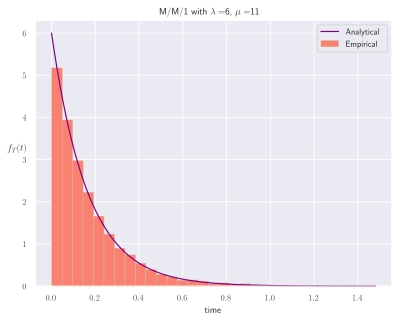

In [61]:
# Ideal PDF of Inter-arrival times :
t_curr_customer = np.linspace(0, np.max(arr_Times), 1000)
analytical_dist = arrival_rate * np.exp(-arrival_rate * t_curr_customer)

fig, axes = plt.subplots()
# Plot the ideal line
axes.plot(t_curr_customer, analytical_dist, color='purple', label='Analytical')
# Plot the empirical line
axes.hist(arr_Times, bins=31, density=True, linewidth=0.5, edgecolor='tan', color='salmon', label='Empirical')
axes.set_xlabel(f'time')
axes.set_ylabel(f'$f_T(t)$', rotation=0)
axes.set_title(f'M/M/1 with $\lambda =${arrival_rate}, $\mu = ${departure_rate}')
axes.legend()
fig.savefig(f'simulation_results/mm1_interArrivalTime_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mm1_interArrivalTime_{arrival_rate}_{departure_rate}.svg', transparent=True)

Observations:
1. The analytical distribution matches the empirically plotted density histogram.
2. The distribution of interarrival times is exponential with rate $\lambda$.

- State Probabilities

Analytical State Probabilities  in equilibrium i.e., when ($\lambda < \mu$),
\begin{align}
p_n &= \mathbb{P}(\text{Queue is in state }n) \\
    &= (1 - \rho) \rho^n\ \quad\ \ldots\ 0 \leq n.
\end{align}

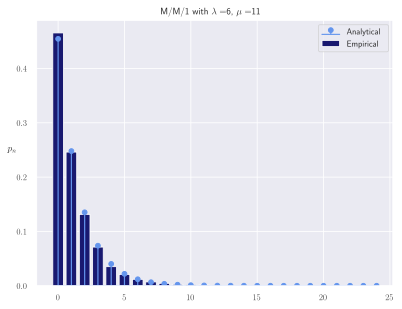

In [62]:
rho = arrival_rate / departure_rate
analytical_dist = []
for i in range(25):
    p_i = (rho ** i) * (1 - rho)
    analytical_dist.append(p_i)

# First, we will extract the unique states and their respective frequencies:
unique_elements, counts = np.unique(queue_history, return_counts=True)

total_count = np.sum(counts)

fig, axes = plt.subplots()
axes.stem(analytical_dist, linefmt='cornflowerblue', basefmt='cornflowerblue', label='Analytical')
axes.bar(unique_elements, counts / total_count, color='midnightblue', label='Empirical')
axes.set_ylabel(f'$p_n$', rotation=0)
axes.set_title(f'M/M/1 with $\lambda =${arrival_rate}, $\mu = ${departure_rate}')
axes.legend()
fig.savefig(f'simulation_results/mm1_stateProbs_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mm1_stateProbs_{arrival_rate}_{departure_rate}.svg', transparent=True)

Observations:
1. For the most part, the fit of the PMF found analytically and that found bar plotting the empirical results match up.
2. The mismatch in some states is due to the stochastic (random) variability of the experiment.

- Average number of customers and Variance of number of customers

Analytical Expressions (in equilibrium):
\begin{align}
\text{Mean number of customers} &:       \bar{N} = \frac{\rho}{1 - \rho} \\
\text{Variance of Number of customers} &: \text{var}(N) = \frac{\rho}{(1 - \rho)^2}
\end{align}

In [63]:
mean_empirical = np.mean(queue_history)
mean_analytical = rho / (1 - rho)

print(f'Analytical mean value : {mean_analytical}\n -> Observed mean value : {mean_empirical}')

var_empirical = np.var(queue_history)
var_analytical = rho / ((1 - rho) ** 2)
print(f'Analytical variance : {var_analytical}\n -> Observed variance : {var_empirical}')

Analytical mean value : 1.1999999999999997
 -> Observed mean value : 1.187544
Analytical variance : 2.6399999999999992
 -> Observed variance : 2.7772912480640017


- Little's Law:
    - The average number of customers in a queue is equal to the product of the arrival rate times the average time spent in the queue.
    - $\bar{N} = \lambda \bar{\tau}$

In [64]:
print(f'Average number of customers in the queue = {mean_empirical}')
print(f'lambda * T_avg = {arrival_rate * np.mean(ind_Times)}')

Average number of customers in the queue = 1.187544
lambda * T_avg = 1.1965178841309818


Response time distribution

$\text{reponse time} (T) = \text{waiting time} + \text{service time}$

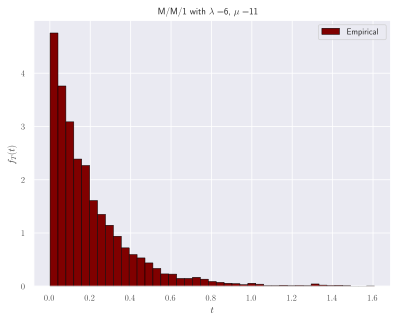

In [65]:
fig, axes = plt.subplots()
axes.hist(ind_Times, bins=41, edgecolor='black', linewidth=0.5, color='maroon', density=True, label='Empirical')
axes.set_xlabel(f'$t$')
axes.set_ylabel(f'$f_T(t)$')
axes.legend()
axes.set_title(f'M/M/1 with $\lambda = ${arrival_rate}, $\mu = ${departure_rate}')
fig.savefig(f'simulation_results/mm1_response_time_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mm1_response_time_{arrival_rate}_{departure_rate}.svg', transparent=True)

Observations:
1. Plotted the histogram of this quantity just out of interest and in search of new insights.

#### M/M/1/N - _Finite buffer case_ 

In [66]:
buffer_size = 10                            # Buffer size of the queue
queue_history, arr_Times, dep_Times, ind_Times = qm.m_m_1_N_q(total_simul_time, del_t, arrival_rate, departure_rate, buffer_size)

In [67]:
np.max(queue_history)                       # Maximum size of the queue at any point in time is atmost buffer_size

10

- Evolution of the state of the system

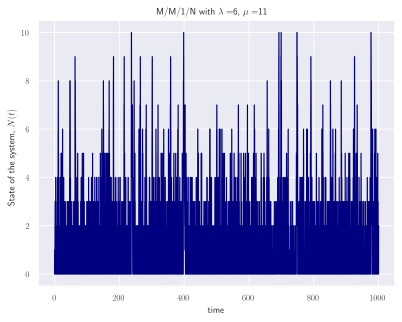

In [68]:
fig, axes = plt.subplots()
axes.plot(del_t * np.arange(int(total_simul_time / del_t)), queue_history, color='navy')
axes.set_xlabel(f'time')
axes.set_ylabel(f'State of the system, $N(t)$')
axes.set_title(f'M/M/1/N with $\lambda = ${arrival_rate}, $\mu = ${departure_rate}')
fig.savefig(f'simulation_results/mm1N_state_history_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mm1N_state_history_{arrival_rate}_{departure_rate}.svg', transparent=True)

- Distribution of Inter-Arrival times

Analytical Distribution :
    Inter-arrival times $\overset{i.i.d}{\sim} \text{Exponential}(\lambda)$

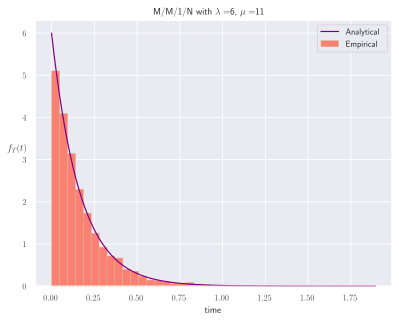

In [69]:
# Ideal PDF of Inter-arrival times :
t_curr_customer = np.linspace(0, max(arr_Times), 1000)
analytical_dist = arrival_rate * np.exp(-arrival_rate * t_curr_customer)

fig, axes = plt.subplots()
# Plot the analytical line
axes.plot(t_curr_customer, analytical_dist, color='purple', label='Analytical')
# Plot the empirical line
axes.hist(arr_Times, bins=41, density=True, linewidth=0.5, edgecolor='tan', color='salmon', label='Empirical')
axes.set_xlabel(f'time')
axes.set_ylabel(f'$f_T(t)$', rotation=0)
axes.set_title(f'M/M/1/N with $\lambda = ${arrival_rate}, $\mu = ${departure_rate}')
axes.legend()
fig.savefig(f'simulation_results/mm1N_interArrivalTime_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mm1N_interArrivalTime_{arrival_rate}_{departure_rate}.svg', transparent=True)

- State Probabilities

Analytical distribution under equilibrium $\lambda < \mu$ :

\begin{align}
    p_n &= \mathbb{P}(\text{system is in state n})\\
        &=  \frac{(1 - \rho) \rho ^ n}{1 - \rho ^{N + 1}}\ &&\quad\ \ldots\ 0 \leq n \leq N, \rho \neq 1\\
        &=  \frac{1}{N + 1}\ &&\quad\ \ldots\ 0 \leq n \leq N, \rho = 1\\
\end{align}

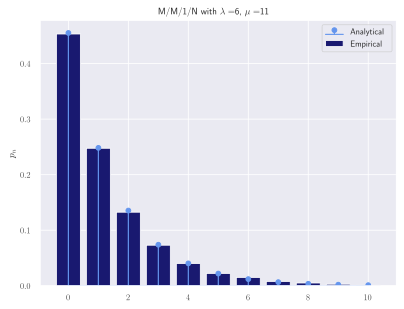

In [70]:
rho = arrival_rate / departure_rate
analytical_dist = []
for i in range(buffer_size+1):
    if rho == 1:
        analytical_dist.append(1 / (buffer_size + 1))
    else:
        p_i = (1 - rho) * (rho ** i) / (1 - (rho ** (buffer_size+1)))
        analytical_dist.append(p_i)

# First, we will extract the unique states and their respective frequencies:
unique_elements, counts = np.unique(queue_history, return_counts=True)

total_count = sum(counts)

fig, axes = plt.subplots()
axes.stem(analytical_dist, linefmt='cornflowerblue', basefmt='cornflowerblue', label='Analytical')
axes.bar(unique_elements, counts / total_count, color='midnightblue', label='Empirical')
axes.set_ylabel(f'$p_n$')
axes.set_title(f'M/M/1/N with $\lambda = ${arrival_rate}, $\mu = ${departure_rate}')
axes.legend()
fig.savefig(f'simulation_results/mm1N_stateProbs_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mm1N_stateProbs_{arrival_rate}_{departure_rate}.svg', transparent=True)

#### M/M/$\infty$ - Infinite server system

In [71]:
queue_history, arr_Times, dep_Times, ind_Times = qm.m_m_infinite_q(total_simul_time, del_t, arrival_rate, departure_rate)

- Evolution of the state of the system

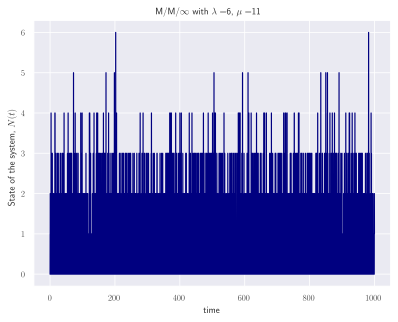

In [72]:
fig, axes = plt.subplots()
axes.plot(del_t * np.arange(int(total_simul_time / del_t)), queue_history, color='navy')
axes.set_xlabel(f'time')
axes.set_ylabel(f'State of the system, $N(t)$')
axes.set_title(f'M/M/$\infty$ with $\lambda = ${arrival_rate}, $\mu = ${departure_rate}')
fig.savefig(f'simulation_results/mmInf_state_history_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mmInf_state_history_{arrival_rate}_{departure_rate}.svg', transparent=True)

- Distribution of Inter-Arrival times

Analytical distribution : Inter-arrival times $\overset{i.i.d}{\sim} \text{Exponential}(\lambda)$

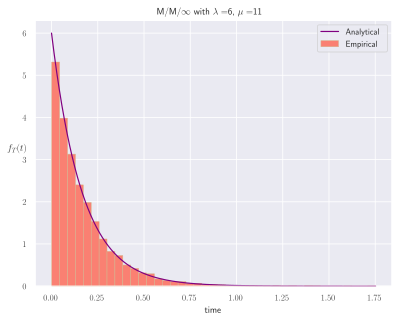

In [73]:
# Ideal PDF of Inter-arrival times :
t_curr_customer = np.linspace(0, np.max(arr_Times), 1000)
analytical_dist = arrival_rate * np.exp(-arrival_rate * t_curr_customer)

fig, axes = plt.subplots()
# Plot the ideal line
axes.plot(t_curr_customer, analytical_dist, color='purple', label='Analytical')
# Plot the empirical line
axes.hist(arr_Times, bins=41, density=True, linewidth=0.5, edgecolor='tan', color='salmon', label='Empirical')
axes.set_xlabel(f'time')
axes.set_ylabel(f'$f_T(t)$', rotation=0)
axes.set_title(f'M/M/$\infty$ with $\lambda = ${arrival_rate}, $\mu = ${departure_rate}')
axes.legend()
fig.savefig(f'simulation_results/mmInf_interArrivalTime_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mmInf_interArrivalTime_{arrival_rate}_{departure_rate}.svg', transparent=True)

- State Probabilities

Analytical state probabilities at equilibrium ($\lambda < \mu$).
\begin{align}
 p_n &= \mathbb{P}(\text{system is in state }n) \\
 &= \frac{\rho^n}{n!} e^{-\rho}\ &&\quad\ \ldots\ n \geq 0.\\
 \text{where, } \rho &= \frac{\lambda}{\mu} 
\end{align}


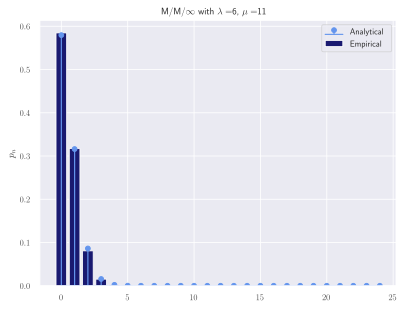

In [74]:
rho = arrival_rate / departure_rate
analytical_dist = []
for i in range(25):
    p_i = (rho ** i) * np.exp(-rho) / factorial(i)
    analytical_dist.append(p_i)

# First, we will extract the unique states and their respective frequencies:
unique_elements, counts = np.unique(queue_history, return_counts=True)

total_count = sum(counts)

fig, axes = plt.subplots()
axes.stem(analytical_dist, linefmt='cornflowerblue', basefmt='cornflowerblue', label='Analytical')
axes.bar(unique_elements, counts / total_count, color='midnightblue', label='Empirical')
axes.set_ylabel(f'$p_n$')
axes.set_title(f'M/M/$\infty$ with $\lambda = ${arrival_rate}, $\mu = ${departure_rate}')
axes.legend()
fig.savefig(f'simulation_results/mmInf_stateProbs_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mmInf_stateProbs_{arrival_rate}_{departure_rate}.svg', transparent=True)

- Average number of customers and Variance of number of customers

In [75]:
mean_empirical = np.mean(queue_history)
mean_analytical = rho 

print(f'Expected mean value : {mean_analytical}\n -> Observed mean value : {mean_empirical}')

var_empirical = np.var(queue_history)
var_analytical = rho 

print(f'Expected variance : {var_analytical}\n -> Observed variance : {var_empirical}')

Expected mean value : 0.5454545454545454
 -> Observed mean value : 0.534339
Expected variance : 0.5454545454545454
 -> Observed variance : 0.5341368330789998


- Departure time (per user) distribution:

In this case, since a customer need not wait in a queue and directly goes into service, it is expected that the time spent in the `queueing facility` is distributed as $\text{Exponential}(\mu)$.

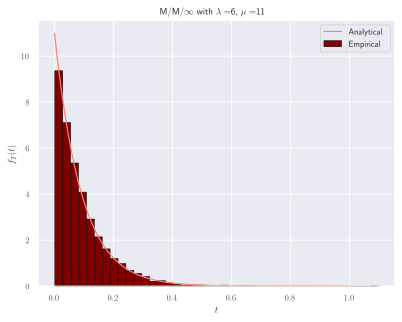

In [76]:
# Analytical Distribution:
x = np.linspace(0, 1, 1000)      
y = departure_rate * np.exp(-departure_rate * x)

fig, axes = plt.subplots()
axes.plot(x, y, color='salmon', label='Analytical')
axes.hist(ind_Times, bins=41, edgecolor='black', linewidth=0.5, color='maroon', density=True, label='Empirical')
axes.set_xlabel(f'$t$')
axes.set_ylabel(f'$f_T(t)$')
axes.legend()
axes.set_title(f'M/M/$\infty$ with $\lambda = ${arrival_rate}, $\mu = ${departure_rate}')
fig.savefig(f'simulation_results/mmInf_response_time_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mmInf_response_time_{arrival_rate}_{departure_rate}.svg', transparent=True)

#### M/M/m - Multiple but Finite Servers

In [77]:
num_servers = 5 
queue_history, arr_Times, dep_Times, ind_Times, waiting_room_state, server_room_state = qm.m_m_m_q(total_simul_time, del_t, arrival_rate, departure_rate, num_servers)

- Evolution of the state of the system

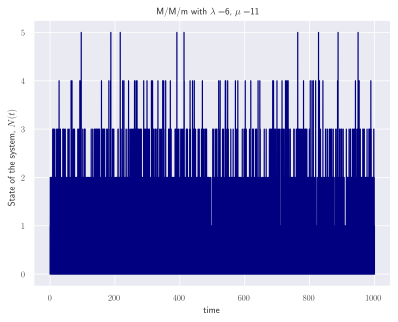

In [78]:
fig, axes = plt.subplots()
axes.plot(del_t * np.arange(int(total_simul_time / del_t)), queue_history, color='navy')
axes.set_xlabel(f'time')
axes.set_ylabel(f'State of the system, $N(t)$')
axes.set_title(f'M/M/m with $\lambda = ${arrival_rate}, $\mu = ${departure_rate}')
fig.savefig(f'simulation_results/mmm_state_history_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mmm_state_history_{arrival_rate}_{departure_rate}.svg', transparent=True)

- Distribution of Inter-Arrival times

Analytical Distribution : Inter-Arrival Times $\overset{i.i.d}{\sim} \text{Exponential}(\lambda)$  

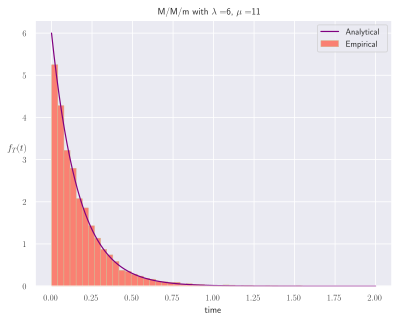

In [79]:
# Analytical PDF of Inter-arrival times :
t_curr_customer = np.linspace(0, 2, 1000)
analytical_dist = arrival_rate * np.exp(-arrival_rate * t_curr_customer)

fig, axes = plt.subplots()
# Plot the analytical PDF
axes.plot(t_curr_customer, analytical_dist, color='purple', label='Analytical')
# Plot the empirical line
axes.hist(arr_Times, bins=41, density=True, linewidth=0.5, edgecolor='tan', color='salmon', label='Empirical')
axes.set_xlabel(f'time')
axes.set_ylabel(f'$f_T(t)$', rotation=0)
axes.set_title(f'M/M/m with $\lambda = ${arrival_rate}, $\mu = ${departure_rate}')
axes.legend()
fig.savefig(f'simulation_results/mmm_interArrivalTime_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mmm_interArrivalTime_{arrival_rate}_{departure_rate}.svg', transparent=True)

- State Probabilities (in equilibrium)

\begin{align} 
            p_0 &= \left[ 1 + \sum_{n=1}^{m-1} \frac{1}{n!} \left( \frac{\lambda}{\mu} \right)^n + \sum_{n=m}^{\infty} \frac{1}{m^{n-m}} \frac{1}{m!} \left( \frac{\lambda}{\mu} \right)^n \right]^{-1}\\
            p_n &= \frac{\lambda^n}{n! \mu^n} p_0 \quad \text{if} \ 1 \leq n < m\\
            p_n &= \frac{\lambda^n}{m^{n-m} m! \mu^n} p_0 \quad \text{if} \ n \geq m.
\end{align}

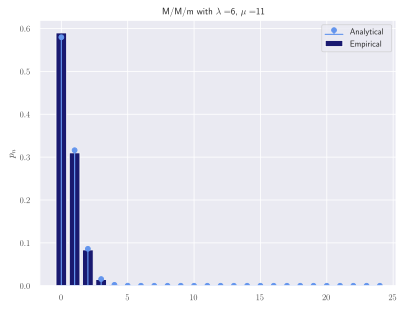

In [80]:
rho = arrival_rate / departure_rate
rho_prime = arrival_rate / (num_servers * departure_rate)
analytical_dist = []
p_0_inv = 1
for n in range(1, num_servers):
    p_0_inv += (1 / factorial(n)) * (rho ** n)
for n in range(num_servers, 2 ** 10):
    # Hopefully the sum will converge 
    p_0_inv += (1 / (num_servers ** (n - num_servers))) * (1 / factorial(num_servers)) * (rho ** n)

p_0 = 1 / p_0_inv

for n in range(num_servers):
    p_i = (1 / factorial(n)) * (rho ** n) * p_0
    analytical_dist.append(p_i)
for n in range(num_servers, 25):
    p_i = (1 / (num_servers ** (n - num_servers))) * (1 / factorial(num_servers)) * (rho ** n) * p_0
    analytical_dist.append(p_i)

# First, we will extract the unique states and their respective frequencies:
unique_elements, counts = np.unique(queue_history, return_counts=True)

total_count = sum(counts)

fig, axes = plt.subplots()
axes.stem(analytical_dist, linefmt='cornflowerblue', basefmt='cornflowerblue', label='Analytical')
axes.bar(unique_elements, counts / total_count, color='midnightblue', label='Empirical')
axes.set_ylabel(f'$p_n$')
axes.set_title(f'M/M/m with $\lambda = ${arrival_rate}, $\mu = ${departure_rate}')
axes.legend()
fig.savefig(f'simulation_results/mmm_stateProbs_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mmm_stateProbs_{arrival_rate}_{departure_rate}.svg', transparent=True)

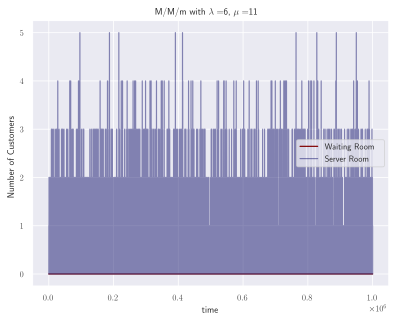

In [81]:
# Study of the waiting room and server room:
fig, axes = plt.subplots()
axes.plot(waiting_room_state, color='maroon', label='Waiting Room')
axes.plot(server_room_state, color='midnightblue', alpha=0.5, label='Server Room')
axes.set_xlabel(f'time')
axes.set_ylabel(f'Number of Customers')
axes.set_title(f'M/M/m with $\lambda = ${arrival_rate}, $\mu = ${departure_rate}')
axes.legend()
fig.savefig(f'simulation_results/mmm_status_{arrival_rate}_{departure_rate}.pdf')
fig.savefig(f'simulation_results/mmm_status_{arrival_rate}_{departure_rate}.svg', transparent=True)

#### M/G/1 Queue

- Theory 
    - Poisson Arrivals with rate $\lambda$.
    - Service times are distributed arbitrarily but with reate $\mu$.
    - Single server.
    - No limits on queue length.

- Analytical Results
    - $\text{Pollaczek-Khinchin Mean Value Formula}$
    - Let $\rho = \frac{\lambda}{\mu}$
    - $\begin{align} 
        \mathbb{E}[n] = \frac{2\rho - \rho^2 + \lambda^2 \sigma_s^2}{2 (1 - \rho)} 
    \end{align}$

- Implementation Details 
    - Slightly different approach from the previous queues has been taken.
    - The modeling of the queue has been started from generating stochastic times or arrival and service. According to these times, the state of the queue, i.e., the number of customers in the queue have been found after every departure.
    - For simplicity, only the $\text{Pollaczek-Khinchin Mean Value Formula}$ has been verified. While I am plotting the state probabilities, I will not be comparing them with the analytical results obtained in the transform domain.

In [82]:
def PolkChinMVformula(rho, lmbda, sig2):
    """ 
    Function to calculate the Pollaczek-Khinchin Mean Value Formula.
    """
    numerator = (2 * rho) - (rho ** 2) + ((lmbda ** 2) * sig2)
    denominator = 2 * (1 - rho)
    return numerator / denominator

In [ ]:
num_customers_obs = 10 ** 4 
queue_history, _, _ =  qm.m_g_1_q(num_customers_obs, arrival_rate, 'exponential', departure_rate)

rho = arrival_rate / departure_rate
print(f'Empirical Mean State: {np.mean(queue_history)}')
print(f'-> Analytical Mean State: {PolkChinMVformula(rho, arrival_rate, 1 / (departure_rate ** 2))}')

In [ ]:
num_customers_obs = 10 ** 4 
queue_history, _, _ =  qm.m_g_1_q(num_customers_obs, arrival_rate, 'deterministic', 1 / departure_rate)

rho = arrival_rate / departure_rate 
print(f'Empirical Mean State: {np.mean(queue_history)}')
print(f'-> Analytical Mean State: {PolkChinMVformula(rho, arrival_rate, 0)}')

Empirical Mean State: 0.8828
->Analytical Mean State: 0.8727272727272727


In [ ]:
num_customers_obs = 10 ** 4 
k, theta = 0.5, 0.1
queue_history, _, _ =  qm.m_g_1_q(num_customers_obs, arrival_rate, 'gamma', [k, theta])

mean_time = k * theta
var_time = k * (theta ** 2)
rho = arrival_rate * mean_time 
print(f'Empirical Mean State: {np.mean(queue_history)}')
print(f'-> Analytical Mean State: {PolkChinMVformula(rho, arrival_rate, var_time)}')

Empirical Mean State: 0.5014
->Analytical Mean State: 0.49285714285714294


In [ ]:
num_customers_obs = 10 ** 4 
lowlim, uplim = 0, 0.1
queue_history, _, _ =  qm.m_g_1_q(num_customers_obs, arrival_rate, 'uniform', [lowlim, uplim])

mean_time = (lowlim + uplim) / 2
var_time = ((uplim - lowlim) ** 2) / 12
print(f'Empirical Mean State: {np.mean(queue_history)}')
print(f'-> Analytical Mean State: {PolkChinMVformula(rho, arrival_rate, var_time)}')

Empirical Mean State: 0.3847
->Analytical Mean State: 0.3857142857142858


<font color='red'> _Note_:</font> The distribution parameters need to be chosen appropriately so as to ensure that the average arrival rate is lesser than the average departure rate in order to ensure that the queueing system achieves equilibrium. In case, the queue conditions are aberrant from those prescribed the behavior of the queue and the analytical results printed here are **invalid**. 